## En este notebook vamos ver cómo aplicar los diferentes algoritmos de clustering a la data de iris y algunas aplicaciones de la PCA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib  notebook

Esta dataset se podía cargar directamente de scikit, dentro del módulo datasets

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()

In [5]:
X = data.data

In [6]:
y = data.target

Vamos a hacer un scatter plot con las diferentes combinaciones de los 4 features

<IPython.core.display.Javascript object>


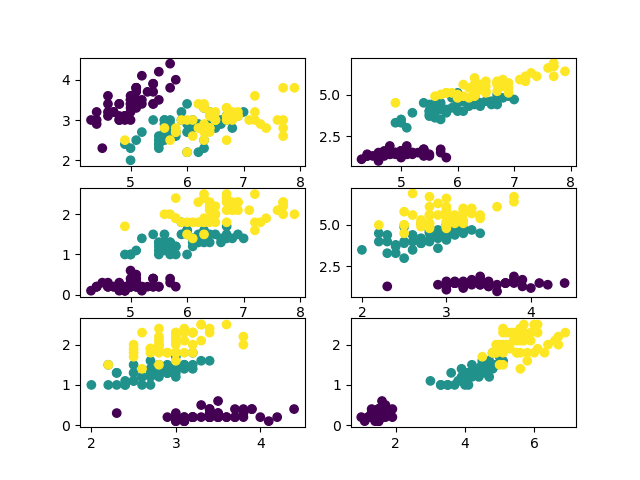

In [7]:
fig, axs= plt.subplots(nrows=3, ncols=2)
axs = axs.flatten()

axs[0].scatter(X[:,0],X[:,1], c = y)
axs[1].scatter(X[:,0],X[:,2], c = y)
axs[2].scatter(X[:,0],X[:,3], c = y)
axs[3].scatter(X[:,1],X[:,2], c = y)
axs[4].scatter(X[:,1],X[:,3], c = y)
axs[5].scatter(X[:,2],X[:,3], c = y)

Vamos a estandarizar los datos, puesto que lo vamos a necesitar para hacer el kmeans (dado que todas las variables tiene que ser del mismo rango) y para hacer la pca

In [8]:
from sklearn import preprocessing

ss = preprocessing.StandardScaler()

X_scaled = pd.DataFrame( ss.fit_transform(X), columns = data.feature_names)

Probamos diferentes algoritmos de clustering y vemos su rendimiento en la reconstrucción de los tres grupos

In [9]:
from sklearn.cluster import KMeans

nclusters = 3

km = KMeans(n_clusters=nclusters, random_state=0, n_init=100)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [10]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters,n_init = 100, random_state=100)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3,compute_full_tree=True)
y_cluster_agg = agg.fit_predict(X_scaled)
y_cluster_agg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
from sklearn.metrics import completeness_score
print(completeness_score(y, y_cluster_kmeans))
print(completeness_score(y, y_cluster_gmm))
print(completeness_score(y, y_cluster_agg))

0.6598476779627759
0.9010648908640206
0.6940248415952218


Veamos el número de clusters usando el método elbow. En este caso, podemos llamar al atributo *inertia_* de kmeans después de fittearlo. Dicho atributo nos devuelve la suma del cuadrado de las distancias a los centroides, que es lo que optimiza kmeans. Para más info, podéis ver la documentación de kmeans en scikit http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

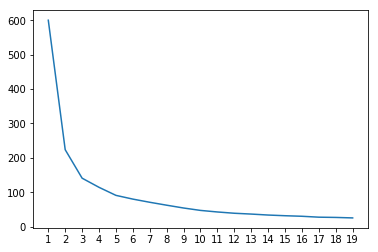

In [15]:
kmeans_scores = []
for k in np.arange(1,20):
    km = KMeans(n_clusters=k, random_state=0, n_init=100)
    km.fit(X_scaled)
    kmeans_scores.append(km.inertia_)

plt.plot(np.arange(1,20), kmeans_scores)
plt.xticks(np.arange(1,20))
pass

### PCA for visualization

Vamos a ver cómo usar la pca, en este caso para facilitarnos la visualización de las clases

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data = X_pca
             , columns = ['pc1', 'pc2'])

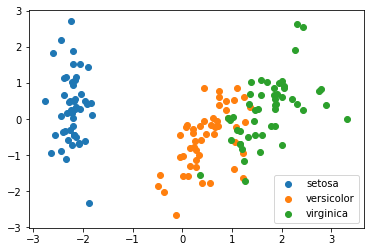

In [17]:
plt.scatter(pca_df.iloc[y==0,0].values,pca_df.iloc[y==0,1].values)
plt.scatter(pca_df.iloc[y==1,0].values,pca_df.iloc[y==1,1].values)
plt.scatter(pca_df.iloc[y==2,0].values,pca_df.iloc[y==2,1].values)
plt.legend(data.target_names)

Una vez fitteada la pca, podemos ver el ratio de la variación explicada por cada componente accediendo al atributo *explained_variance_ratio_* del objeto de la pca. Para más info, podéis acceder a la documentación de la clase PCA en scikit http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [26]:
print( "la variacion de cada compenentes es = " , pca.explained_variance_ratio_)
print( "la variacion total explicada por las componentes de la pca es = " , np.sum(pca.explained_variance_ratio_))

('la variacion de cada compenentes es = ', array([0.72770452, 0.23030523]))
('la variacion total explicada por las componentes de la pca es = ', 0.9580097536148198)


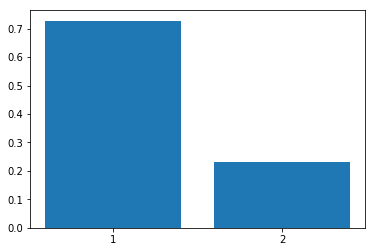

In [22]:
plt.bar([1,2], pca.explained_variance_ratio_)
plt.xticks([1,2])
pass

También podríamos haberle pedido que nos hiciera la descomposición en tres componentes

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data = X_pca
             , columns = ['pc1', 'pc2','pc3'])

In [30]:
print( "la variacion total explicada en este caso es = " , np.sum(pca.explained_variance_ratio_))

('la variacion total explicada en este caso es = ', 0.9948480731910937)


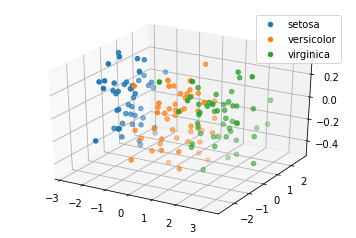

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df.iloc[y==0,0].values,pca_df.iloc[y==0,1].values, pca_df.iloc[y==0,2].values)
ax.scatter(pca_df.iloc[y==1,0].values,pca_df.iloc[y==1,1].values, pca_df.iloc[y==0,2].values)
ax.scatter(pca_df.iloc[y==2,0].values,pca_df.iloc[y==2,1].values,pca_df.iloc[y==0,2].values)
ax.legend(data.target_names)

Por otro lado, cuando usamos la pca, también podemos pasarle la variación de los datos que queremos que explique. Se lo pasamos como un float entre 0 y 1 al argumento n_components. De esta manera, la pca coge las componentes que calculan la variación de los datos que queremos explicar. Podemos acceder al atributo *n_components__* (con una sola barra baja al final) para saber las componentes seleccionadas

In [36]:
# Por ejemplo pedimos al menos el 70%
pca = PCA(n_components=0.70)
pca.fit(X_scaled)
print( "El numero de componentes seleccionadas es = " , pca.n_components_)
print( "la variacion total explicada en este caso es = " , np.sum(pca.explained_variance_ratio_))

('El numero de componentes seleccionadas es = ', 1)
('la variacion total explicada en este caso es = ', 0.7277045209380133)


### PCA para reducir el tiempo computacional (Opcional)

Podemos usar pca para reducir el número de dimensiones y así reducir la carga computacional

In [59]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( mnist.data, mnist.target, test_size=0.2, random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [71]:
from sklearn.decomposition import PCA

pca = PCA(.95)

In [72]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [73]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [78]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
#clf = LogisticRegression(solver = 'lbfgs')
clf = SGDClassifier()

In [79]:
import time

start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
print("el tiempo que ha tardado usando toda la data:", end_time - start_time)
print(clf.score(X_test, y_test))

/home/javitxu/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


('el tiempo que ha tardado usando toda la data:', 5.105981826782227)
0.9115


In [80]:
start_time = time.time()
clf.fit(X_train_pca, y_train)
end_time = time.time()
print("el tiempo que ha tardado usando el 95%:", end_time - start_time)
print(clf.score(X_test_pca, y_test))

('el tiempo que ha tardado usando el 95%:', 3.428057909011841)
0.9120714285714285
